In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium

#This will allow us to use the Google drive to load files
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


This Program will access the files places in the /Data/Inputs section and from the WRPS Website to generate the output files for processing
Required Input Files
1.   PMD-en.csv  - The Stats Can proximity data -https://open.canada.ca/data/en/dataset/a2093d3a-7597-456a-bacf-c6a7f319ddcb
2.    ldb_000b21a_e.shp ( and associated files) - Shape file from statistics Canada for the dissemination block data - https://www12.statcan.gc.ca/census-recensement/2021/geo/sip-pis/boundary-limites/index2021-eng.cfm?year=21
3. CallTypesClassifications.csv - hand made csv file containing the call types and their groupings
4. 98-401-X2021006_English_CSV_data_Ontario.csv - Statistics Canada Census Data for all ontario by Census Block https://www12.statcan.gc.ca/census-recensement/2021/dp-pd/prof/details/download-telecharger.cfm?Lang=E
Output Files


1.   WaterlooRegionIncidentDatawith_Dissemination_area_and_block.csv - Incident data with da and db in columns
2.   Waterloo_region_proximity_withGeography_df.csv - proximity data with the b geography attached
3. Waterloo_region_filtered_proximity_df.csv - proximity data with only Waterloo region included
4. RegionalData_gdf_with_DAUID.shp - Shape file for all Waterloo region da from stats canada
5. Waterloo_region_dissemination_data_with_geoshapes.csv - region census data with geometry of shapes
6. RegionalCensusData_ByDisseminationArea_tables.csv - Stats Can Census data without pivot
7. regional_gdf.shp Regional dissemination block data with geometery data included






In [ ]:
#Identify the Dissemination areas for Waterloo region
#Note : this is over complicated and there is a better way but for our purposes this works
North_Dumfries = ['35300798','35300799','35300800','35300801','35300802','35300803','35300804','35300805','35300806','35300807','35300808','35300809','35300810','35300811','35300812','35300813','35300814'] #17
Cambridge=['35300464','35300466','35300469','35300470','35300471','35300472','35300476','35300477','35300478','35300479','35300480','35300481','35300482','35300483','35300484','35300485','35300486','35300487','35300488','35300489','35300492','35300493','35300494','35300495','35300496','35300498','35300500','35300501','35300502','35300503','35300504','35300505','35300507','5300508','35300510','35300511','35300512','35300514','35300515','5300516','35300517','35300525','35300526','35300527','35300528','35300529','35300530','35300531','35300537','35300538','35300539','35300540','35300541','35300542','35300543','35300544','35300545','35300547','35300548','35300549','35300550','35300551','35300552','35300553','35300554','35300555','35300556','35300557','35300558','35300559','35300560','35300561','35300611','35300612','35300613','35300614','35300615','35300618','35300619','35300620','35300621','35300622','35300623','35300624','35300625','35300626','35300627','35300628','35300629','35300630','35300631','35300632','35300633','35300634','35300636','35300639','35300640','35300641','35300642','35300645','35300646','35300647','35300648','35300649','35300650','35300651','35300652','35300653','35300654','35300655','35300656','35300657','35300658','35300660','35300661','35300662','35300663','35300664','35300665','35300667','35300671','35300674','35300677','35300678','35300679','35300680','35300681','35300682','35300683','35300684','35300685','35300686','35300687','35300688','35300689','35300693','35300694','35300705','35300706','35300707','35300721','35300722','35300727','35300734','35300851','35300853','35300854','35300856','35300857','35300858','35300859','35300860','35300861','35300863','35300864','35300869','35300870','35300871','35300885','35300886','35300887','35300888','35300889','35300890','35300891','35300892','35300895','35300896','35300899','35300900','35300909','35300911','35300948','35300949','35300965','35300966','35300967','35300968','35300995','35300996','35300997','35300998','35300999','35301027','35301035','35301036','35301049','35301050','35301051']
Kitchener = ['35300097','35300098','35300099','35300100','35300101','35300104','35300110','35300113','35300128','35300129','35300130','35300134','35300135','35300136','35300137','35300138','35300139','35300140','35300141','35300142','35300143','35300144','35300145','35300146','35300147','35300148','35300149','35300150','35300151','35300152','35300153','35300154','35300155','35300158','35300159','35300160','35300161','35300162','35300163','35300164','35300165','35300166','35300167','35300168','35300169','35300171','35300172','35300173','35300177','35300179','35300180','35300181','35300182','35300183','35300184','35300185','35300186','35300187','35300189','35300190','35300191','35300192','35300193','35300194','35300195','35300196','35300197','35300198','35300199','35300200','35300201','35300202','35300203','35300204','35300205','35300206','35300207','35300208','35300212','35300213','35300214','35300217','35300218','35300219','35300222','35300223','35300224','35300225','35300226','35300227','35300228','35300231','35300237','35300238','35300243','35300247','35300249','35300250','35300252','35300253','35300254','35300255','35300256','35300259','35300262','35300277','35300280','35300329','35300330','35300332','35300333','35300334','35300335','35300338','35300339','35300340','35300341','35300343','35300344','35300347','35300348','35300349','35300350','35300351','35300353','35300354','35300355','35300357','35300358','35300359','35300360','35300361','35300362','35300363','35300364','35300365','35300366','35300367','35300368','35300369','35300370','35300371','35300372','35300373','35300374','35300375','35300376','35300377','35300378','35300379','35300380','35300381','35300382','35300383','35300384','35300385','35300386','35300387','35300388','35300389','35300390','35300391','35300392','35300393','35300394','35300395','35300396','35300397','35300398','35300399','35300400','35300401','35300402','35300403','35300404','35300405','35300406','35300407','35300408','35300409','35300410','35300413','35300414','35300415','35300416','35300417','35300418','35300424','35300425','35300429','35300431','35300432','35300433','35300434','35300435','35300436','35300437','35300438','35300439','35300440','35300441','35300442','35300443','35300444','35300445','35300446','35300447','35300448','35300449','35300450','35300451','35300452','35300453','35300454','35300455','35300456','35300460','35300462','35300463','35300473','35300563','35300564','35300565','35300566','35300567','35300568','35300569','35300573','35300574','35300575','35300701','35300702','35300708','35300709','35300711','35300713','35300714','35300716','35300717','35300726','35300729','35300730','35300836','35300837','35300838','35300839','35300840','35300841','35300842','35300843','35300844','35300845','35300846','35300847','35300877','35300878','35300881','35300882','35300883','35300894','35300902','35300913','35300916','35300917','35300918','35300919','35300920','35300921','35300922','35300929','35300930','35300946','35300947','35300950','35300952','35300954','35300955','35300957','35300958','35300960','35300961','35300962','35300963','35300979','35300980','35300981','35300982','35300983','35300984','35300985','35300987','35300988','35300989','35300991','35300992','35300993','35301001','35301002','35301003','35301004','35301005','35301009','35301010','35301012','35301013','35301014','35301031','35301032','35301033','35301037','35301038','35301039','35301040','35301052','35301053','35301054','35301055','35301056','35301057','35301059','35301060']
Waterloo =['35300027','35300028','35300029','35300030','35300031','35300032','35300033','35300034','35300035','35300036','35300037','35300038','35300039','35300040','35300041','35300042','35300043','35300044','35300045','35300046','35300047','35300048','35300049','35300050','35300051','35300052','35300053','35300054','35300055','35300056','35300057','35300058','35300059','35300060','35300061','35300062','35300063','35300064','35300065','35300066','35300070','35300071','35300072','35300073','35300074','35300075','35300076','35300078','35300079','35300080','35300081','35300082','35300084','35300085','35300086','35300087','35300088','35300089','35300090','35300091','35300092','35300095','35300096','35300112','35300116','35300117','35300118','35300119','35300120','35300121','35300122','35300125','35300126','35300127','35300131','35300132','35300133','35300265','35300266','35300267','35300268','35300269','35300273','35300275','35300276','35300282','35300283','35300285','35300286','35300287','35300288','35300289','35300290','35300291','35300292','35300296','35300297','35300298','35300579','35300580','35300581','35300582','35300583','35300584','35300587','35300588','35300589','35300590','35300591','35300598','35300599','35300600','35300718','35300719','35300720','35300728','35300732','35300737','35300738','35300739','35300740','35300749','35300821','35300822','35300823','35300824','35300825','35300826','35300827','35300828','35300830','35300833','35300872','35300873','35300874','35300875','35300876','35300927','35300928','35300932','35300944','35300945','35300970','35300971','35300972','35300973','35300974','35300975','35300976','35300977','35301017','35301041','35301042','35301043','35301044']
Wilmot=['35300774','35300775','35300777','35300778','35300780','35300783','35300784','35300785','35300786','35300787','35300788','35300789','35300790','35300791','35300792','35300793','35300795','35300796','35300797','35300815','35300816','35300818','35300819','35301020','35301023','35301025','35301026','35301045','35301046']
Wellesley=['35300755','35300756','35300757','35300758','35300759','35300760','35300761','35300762','35300763','35300764','35300765','35300766','35300767','35300768','35300769','35300770','35300771','35300772','35300773']
Wilmot=['35300002','35300003','35300004','35300005','35300006','35300007','35300008','35300009','35300010','35300011','35300012','35300013','35300741','35300742','35300743','35300744','35300745','35300746','35300747','35300751','35300754','35300832','35300850','35300904','35300906','35300908','35300934','35300936','35300938','35300939','35300942','35300943','35301007','35301008','35301047','35301048']
North_Dumfries = [int(code) for code in North_Dumfries]
Cambridge = [int(code) for code in Cambridge]
Kitchener = [int(code) for code in Kitchener]
Waterloo = [int(code) for code in Waterloo]
Wilmot = [int(code) for code in Wilmot]
Wellesley = [int(code) for code in Wellesley]
regions = North_Dumfries + Cambridge + Kitchener + Waterloo + Wilmot + Wellesley
display(len(regions))

737

In [ ]:

#Takes about 20 mins
%%time
# URLs of the Excel files
urls = [
    "https://www.wrps.on.ca/en/resourcesGeneral/Occurrence-Data/WRPSAnnualDataExtract_2022.xlsx",
    "https://www.wrps.on.ca/en/resourcesGeneral/Occurrence-Data/WRPSAnnualDataExtract_2021.xlsx",
    "https://www.wrps.on.ca/en/resourcesGeneral/Occurrence-Data/WRPSOccurrenceData_Year_2020_September_29_2021.xlsx",
    "https://www.wrps.on.ca/en/resourcesGeneral/Occurrence-Data/WRPSOccurrenceData_Year_2019.xlsx",
    "https://www.wrps.on.ca/en/resourcesGeneral/Occurrence-Data/WRPSOccurrenceData_Year_2018_September_25_2019.xlsx",
    "https://www.wrps.on.ca/en/resourcesGeneral/Occurrence-Data/WRPSOccurrenceData_Year_2017_August_28_2018.xlsx",
    "https://www.wrps.on.ca/en/resourcesGeneral/Occurrence-Data/WRPSOccurrenceData_Year_2016_Jan16_2018.xlsx",
    "https://www.wrps.on.ca/en/resourcesGeneral/Occurrence-Data/WRPSOccurrenceData_Year_2015.xlsx",
    "https://www.wrps.on.ca/en/resourcesGeneral/Occurrence-Data/WRPSOccurrenceData_Year_2014.xlsx",
    "https://www.wrps.on.ca/en/resourcesGeneral/Occurrence-Data/WRPSOccurrenceData_Year_2013.xlsx",
    "https://www.wrps.on.ca/en/resourcesGeneral/Occurrence-Data/WRPSOccurrenceData_Year_2012.xlsx",
    "https://www.wrps.on.ca/en/resourcesGeneral/Occurrence-Data/WRPSOccurrenceData_Year_2011.xlsx"
]
urls.reverse()
# Load each Excel file into separate DataFrames
dfs = []
for url in urls:
    df = pd.read_excel(url, engine='openpyxl')
    dfs.append(df)

# Display the first few rows of each DataFrame
for i, df in enumerate(dfs, start=2011):
    print(f"DataFrame for year {i}: {df.shape[0]}" )


DataFrame for year 2011: 299036
DataFrame for year 2012: 302533
DataFrame for year 2013: 301828
DataFrame for year 2014: 295427
DataFrame for year 2015: 280140
DataFrame for year 2016: 287520
DataFrame for year 2017: 297228
DataFrame for year 2018: 304104
DataFrame for year 2019: 305897
DataFrame for year 2020: 288966
DataFrame for year 2021: 307219
DataFrame for year 2022: 323911
CPU times: user 21min 5s, sys: 5.7 s, total: 21min 10s
Wall time: 22min 15s


In [ ]:
#Rename the columns since the older ones have spaces in the names and the newer ones do not
#pretty sure i got them all

for i, df in enumerate(dfs, start=2011):
    df.rename(columns={'Reported Date and Time': 'ReportedDateandTime'}, inplace=True)
    df.rename(columns={'Occurrence Number': 'occurrencefileno'}, inplace=True)
    df.rename(columns={'Geographic Location': 'GeographicLocation'}, inplace=True)
    # df.rename(columns={'Geographic Location': 'GeographicLocation'}, inplace=True)
    df.rename(columns={'Nearest Intersection Location': 'NearestIntersectionLocation'}, inplace=True)
    df.rename(columns={'Patrol Division': 'PatrolDivision'}, inplace=True)
    df.rename(columns={'Patrol Zone': 'PatrolZone'}, inplace=True)
    df.rename(columns={'Initial Call Type': 'InitialCallType'}, inplace=True)
    df.rename(columns={'Initial Call Type Description': 'InitialCallTypeDescription'}, inplace=True)
    df.rename(columns={'Final Call Type': 'FinalCallType'}, inplace=True)
    df.rename(columns={'Final Call Type Description': 'FinalCallTypeDescription'}, inplace=True)

    df.rename(columns={'Initial Priority': 'InitialPriority'}, inplace=True)
    df.rename(columns={'Final Priority': 'FinalPriority'}, inplace=True)

    df.rename(columns={' Dispatch Date and Time': 'DispatchDateandTime'}, inplace=True)
    df.rename(columns={'Arrival Date and Time': 'ArrivalDateandTime'}, inplace=True)
    df.rename(columns={'Cleared Date and Time': 'ClearedDateandTime'}, inplace=True)
    df.rename(columns={'Call Dispatch Delay': 'CallDispatchDelay'}, inplace=True)
    df.rename(columns={'Call Travel Time': 'CallTravelTime'}, inplace=True)
    df.rename(columns={'Call On-Scene Time': 'CallOnSceneTime'}, inplace=True)
    df.rename(columns={'Call Response Time': 'CallResponseTime'}, inplace=True)
    df.rename(columns={'Call Service Time': 'CallServiceTime'}, inplace=True)
    df.rename(columns={'Total Unit Service Time': 'TotalUnitServiceTime'}, inplace=True)




In [ ]:
#Checkto see if I got all the columns

#using the columns of the first frame as a reference loop over them
for col_index, col_name in enumerate(dfs[0].columns):

    #check if the columns match in each dataframe
    for i, df in enumerate(dfs[1:], start=2012):
        if col_name != dfs[i-2011].columns[col_index]:
            print(f"Column '{col_name}' does not match in DataFrame for year {i}.")

In [ ]:


#Verify the oclumn names
for i, df in enumerate(dfs, start=2011):
    print(f"DataFrame for year {i}:")
    print(df.columns)
    print("\n")

#Chck for Null and Zero in the Total Unit service time
# if there is no unitservice time there was likely no police response so maybe need to be outside of the set
#For discussion , it might be better to leave them in depending on how we divide the calls for modelling
for i, df in enumerate(dfs, start=2011):
    null_values = df['TotalUnitServiceTime'].isnull().sum()
    zero_values = (df['TotalUnitServiceTime'] == 0).sum()
    print(f"DataFrame for year {i}:")
    print(f"Number of null values: {null_values}")
    print(f"Number of zero values: {zero_values}")
    print("\n")

DataFrame for year 2011:
Index(['occurrencefileno', 'GeographicLocation', 'NearestIntersectionLocation',
       'PatrolDivision', 'PatrolZone', 'Municipality', 'ReportedDateandTime',
       'InitialCallType', 'InitialCallTypeDescription', 'FinalCallType',
       'FinalCallTypeDescription', 'InitialPriority', 'FinalPriority',
       'Disposition', 'DispatchDateandTime', 'ArrivalDateandTime',
       'ClearedDateandTime', 'CallDispatchDelay', 'CallTravelTime',
       'CallOnSceneTime', 'CallResponseTime', 'CallServiceTime',
       'TotalUnitServiceTime'],
      dtype='object')


DataFrame for year 2012:
Index(['occurrencefileno', 'GeographicLocation', 'NearestIntersectionLocation',
       'PatrolDivision', 'PatrolZone', 'Municipality', 'ReportedDateandTime',
       'InitialCallType', 'InitialCallTypeDescription', 'FinalCallType',
       'FinalCallTypeDescription', 'InitialPriority', 'FinalPriority',
       'Disposition', 'DispatchDateandTime', 'ArrivalDateandTime',
       'ClearedDateandT

In [ ]:
#Start by removing rows that have no service time(See Note above)

cleaned_dfs = []

for i, df in enumerate(dfs, start=2011):
    if 'TotalUnitServiceTime' in df.columns:
        # Filter out rows with null or zero TotalUnitServiceTime
        df_cleaned = df[df['TotalUnitServiceTime'].notnull() & (df['TotalUnitServiceTime'] != 0)]
        cleaned_dfs.append(df_cleaned)
        print(f"DataFrame for year {i}: Removed rows with null or zero TotalUnitServiceTime.")
    else:
        cleaned_dfs.append(df)
        print(f"DataFrame for year {i}: Column 'TotalUnitServiceTime' not found, DataFrame remains unchanged.")

DataFrame for year 2011: Removed rows with null or zero TotalUnitServiceTime.
DataFrame for year 2012: Removed rows with null or zero TotalUnitServiceTime.
DataFrame for year 2013: Removed rows with null or zero TotalUnitServiceTime.
DataFrame for year 2014: Removed rows with null or zero TotalUnitServiceTime.
DataFrame for year 2015: Removed rows with null or zero TotalUnitServiceTime.
DataFrame for year 2016: Removed rows with null or zero TotalUnitServiceTime.
DataFrame for year 2017: Removed rows with null or zero TotalUnitServiceTime.
DataFrame for year 2018: Removed rows with null or zero TotalUnitServiceTime.
DataFrame for year 2019: Removed rows with null or zero TotalUnitServiceTime.
DataFrame for year 2020: Removed rows with null or zero TotalUnitServiceTime.
DataFrame for year 2021: Removed rows with null or zero TotalUnitServiceTime.
DataFrame for year 2022: Removed rows with null or zero TotalUnitServiceTime.


In [ ]:
#Other removals should probably go here

In [ ]:
for i, clean_df in enumerate(cleaned_dfs, start=2011):
    print(f"DataFrame for year {i}:")
    print(clean_df.shape)
    print("\n")

DataFrame for year 2011:
(201157, 23)


DataFrame for year 2012:
(200653, 23)


DataFrame for year 2013:
(197816, 23)


DataFrame for year 2014:
(186957, 23)


DataFrame for year 2015:
(186440, 23)


DataFrame for year 2016:
(180909, 23)


DataFrame for year 2017:
(182681, 23)


DataFrame for year 2018:
(176548, 23)


DataFrame for year 2019:
(167937, 23)


DataFrame for year 2020:
(160212, 23)


DataFrame for year 2021:
(170286, 23)


DataFrame for year 2022:
(165897, 23)




In [ ]:
#Merge them into one data set
merged_occurrence_df = pd.concat(cleaned_dfs, ignore_index=True)



In [ ]:
#Convert Into a date time and show counts by year
merged_occurrence_df['ReportedDateandTime'] = pd.to_datetime(merged_occurrence_df['ReportedDateandTime'])



counts_by_year = merged_occurrence_df.groupby(merged_occurrence_df['ReportedDateandTime'].dt.year).size()

print("Counts of rows by year:")
print(counts_by_year)


<ipython-input-10-0b766aa4a2d7>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_occurrence_df['ReportedDateandTime'] = pd.to_datetime(merged_occurrence_df['ReportedDateandTime'])


Counts of rows by year:
ReportedDateandTime
2011    201157
2012    200653
2013    197816
2014    186957
2015    186440
2016    180909
2017    182681
2018    176548
2019    167937
2020    160212
2021    170286
2022    165897
dtype: int64


In [ ]:
#lets pull in the proximity data by Dissemination blocks(smaller geography) and see what we can get for proximity data
#First we need teh geography

dissemination_blocks_shapefile = '/content/drive/MyDrive/Group 3 Machine Learning/Project Files/Data/Inputs/ldb_000b21a_e.shp'
dissemination_blocks_gdf = gpd.read_file(dissemination_blocks_shapefile)
display(dissemination_blocks_gdf.head())
#using the above data i want to filter for only the regions in waterloo region
regions_str = [str(code) for code in regions]
regional_gdf = dissemination_blocks_gdf[dissemination_blocks_gdf['DGUID'].astype(str).str.contains('|'.join(regions_str))]
display(regional_gdf.shape)

# regional_gdf.to_file('/content/drive/MyDrive/Group 3 Machine Learning/Project Files/Data/Outputs/regional_gdf.shp') #save shape file as well


,DBUID,DGUID,DBRPLAMX,DBRPLAMY,LANDAREA,PRUID,geometry
0,10010165001,2021S051310010165001,8.978141e+06,2.146648e+06,0.0599,10,"POLYGON ((8978228.163 2146822.983, 8978267.626..."
1,10010165002,2021S051310010165002,8.978032e+06,2.146442e+06,0.0084,10,"POLYGON ((8978093.463 2146445.280, 8978054.226..."
2,10010165006,2021S051310010165006,8.978366e+06,2.146134e+06,0.3063,10,"POLYGON ((8978018.723 2146397.440, 8978054.226..."
3,10010165007,2021S051310010165007,8.978621e+06,2.146487e+06,0.0071,10,"POLYGON ((8978545.646 2146380.763, 8978655.237..."
4,10010166001,2021S051310010166001,8.978564e+06,2.146512e+06,0.0207,10,"POLYGON ((8978655.237 2146599.654, 8978545.646..."


(4216, 7)

In [ ]:
#lets load the proximity data and join it with the geography data
proximity_df = pd.read_csv("/content/drive/MyDrive/Group 3 Machine Learning/Project Files/Data/Inputs/PMD-en.csv",encoding = 'ISO-8859-1')
# display(proximity_df)
#display(proximity_df.dtypes)

# Get unique DBUID values from regional_gdf
regional_gdf['DBUID'] = regional_gdf['DBUID'].astype(str)
unique_DBUIDs = regional_gdf['DBUID'].unique()
#display(unique_DBUIDs.shape)
filtered_proximity_df = proximity_df[proximity_df['DBUID'].astype(str).isin(unique_DBUIDs)]
display(filtered_proximity_df.shape)
# Save the filtered proximity data so we dont have to run this every time
filtered_proximity_df.to_csv('/content/drive/MyDrive/Group 3 Machine Learning/Project Files/Data/Outputs/Waterloo_region_filtered_proximity_df.csv', index=False)


DBUID                   int64
DBPOP                 float64
DAUID                   int64
DAPOP                 float64
CSDUID                  int64
CSDNAME                object
CSDTYPE                object
CSDPOP                float64
CMAUID                  int64
CMAPUID                 int64
CMANAME                object
CMATYPE                object
CMAPOP                float64
PRUID                   int64
PRNAME                 object
PRPOP                 float64
lon                   float64
lat                   float64
in_db_emp             float64
prox_idx_emp           object
in_db_pharma          float64
prox_idx_pharma        object
in_db_childcare       float64
prox_idx_childcare     object
in_db_health          float64
prox_idx_health        object
in_db_grocery         float64
prox_idx_grocery       object
in_db_educpri         float64
prox_idx_educpri       object
in_db_educsec         float64
prox_idx_educsec       object
in_db_lib             float64
prox_idx_l

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


(4216, 39)

In [ ]:

#Created a CLassification file to allow us to put call types into classification groupings(IE Vehicle collisions cover a couple call types )
call_types_df = pd.read_csv("/content/drive/MyDrive/Group 3 Machine Learning/Project Files/Data/Inputs/CallTypesClassifications.csv")


display(call_types_df)
# Perform a merge operation
GroupedCallClassifications_df = pd.merge(merged_occurrence_df, call_types_df, how='left', left_on='FinalCallType', right_on='FinalCallType')
#display(GroupedCallClassifications_df.columns)

# Extract year and month from the 'Date' column
GroupedCallClassifications_df['Year'] = GroupedCallClassifications_df['ReportedDateandTime'].dt.year
GroupedCallClassifications_df['Month'] = GroupedCallClassifications_df['ReportedDateandTime'].dt.month
#display(GroupedCallClassifications_df.columns)

# Display the merged DataFrame
# print(GroupedCallClassifications_df)

,FinalCallType,FinalCallTypeDescription,CallGrouping
0,9130,9130-THEFT MOTOR VEHICLE,Auto Theft
1,9110,9110-BREAK & ENTER,Break and Enter
2,9930,9930-DOMESTIC OTHER,Domestic Violence
3,9330,9330-DOMESTIC DISPUTE,Domestic Violence
4,9940,9940-ELDER ABUSE,Domestic Violence
...,...,...,...
78,9900,9900-CRIMINAL HARASSMENT/STALKING,Threatening
79,9500,9500-MVC PROP. DAMAGE,Traffic Collision
80,9510,9510-MVC PERSONAL INJURY,Traffic Collision
81,9520,9520-MVC HIT AND RUN,Traffic Collision


In [ ]:
import geopandas as gpd
import ast
# display(GroupedCallClassifications_df)
regional_gdf = gpd.read_file('/content/drive/MyDrive/Group 3 Machine Learning/Project Files/Data/Outputs/regional_gdf.shp')
# display(regional_gdf)

Waterloo_region_proximity_withGeography_df = pd.read_csv('/content/drive/MyDrive/Group 3 Machine Learning/Project Files/Data/Outputs/Waterloo_region_proximity_withGeography_df.csv')
#display(Waterloo_region_proximity_withGeography_df)



# Function to split and populate 'x_cord' and 'y_cord' columns
def split_geolocation(geolocation):
    if pd.notna(geolocation):
        try:
            x_cord, y_cord = map(float, ast.literal_eval(geolocation))
            return x_cord, y_cord
        except (ValueError, SyntaxError):
            pass
    return None, None

# Apply the split function to 'GeographicLocation' column and create 'x_cord' and 'y_cord' columns
GroupedCallClassifications_df['x_cord'], GroupedCallClassifications_df['y_cord'] = zip(*GroupedCallClassifications_df['GeographicLocation'].map(split_geolocation))
# display(GroupedCallClassifications_df)

In [ ]:
#need to add the dissemination area identifier to the GDF for search returns
merged_regional_gdf = regional_gdf.merge(Waterloo_region_proximity_withGeography_df[['DBUID', 'DAUID']], on='DBUID', how='left')

# display(merged_regional_gdf)

In [ ]:
#Test function to find the dissemination area each incident is in by X and Y corordinate , also testing the downloaded data
#DAUID should be 3294 anything else means the ransforms are off
import math
import pyproj
from shapely.geometry import Point
#This function will allow us to create a column on the main data set to tell us what dissemination area we are
#in and join it to the population data.
def find_dissemination_area(x, y, geodataframe_loaded):
    # Define the source CRS (NAD83 UTM Zone 17N) and the target CRS (NAD83(CSRS) / New Brunswick Stereographic)
    source_refsystem = pyproj.CRS("EPSG:26917")
    target_refsystem = pyproj.CRS("EPSG:3347")
    transformer = pyproj.Transformer.from_crs(source_refsystem, target_refsystem)

    # Check if x or y is empty
    if math.isnan(x) or math.isnan(y):
        return None

    # Transform the x and y coordinates to the target refsystem
    x_target, y_target = transformer.transform(x, y)

    # Create a Point object from the transformed x and y coordinates
    location_point = Point(x_target, y_target)

    # Check if the Point is inside any of the polygons in the GeoDataFrame
    selected_polygon = geodataframe_loaded[geodataframe_loaded.geometry.contains(location_point)]

    if not selected_polygon.empty:
        # Return the dissemination area(DAUID) of the polygon
        #return selected_polygon['DAUID'].iloc[0]
        # modified after 'DAUID' is made index...
        dbuid_value = selected_polygon.at[selected_polygon.index[0], 'DBUID']
        dauid_value = selected_polygon.at[selected_polygon.index[0], 'DAUID']
        display(dbuid_value)
        display(dauid_value)
        return selected_polygon.index[0]
    else:
        #Note maybe we should log an error for this or maybe just ignore it completely and filter for locations with no area
        return None

x = 539631.622100
y = 4805863.230400

result = find_dissemination_area(x, y, merged_regional_gdf)

if result is not None:
    print("Coordinates are in DAUID:", result)
else:
    print("Coordinates are not in any polygon.")

35300919004

35300919

Coordinates are in DAUID: 3294


In [ ]:
df_dissemination_added = GroupedCallClassifications_df.copy()
# display(df_dissemination_added)

In [ ]:
#This takes about an hour to run over the whole set


def find_dissemination_area_vectorized(geolocations, geodataframe_loaded):
    x_cords, y_cords = zip(*map(split_geolocation, geolocations))
    source_refsystem = pyproj.CRS('EPSG:26917')
    target_refsystem = pyproj.CRS('EPSG:3347')
    transformer = pyproj.Transformer.from_crs(source_refsystem, target_refsystem)

    dissemination_blocks = []
    dissemination_areas = []

    for x, y in zip(x_cords, y_cords):
        if x is None or y is None:
            dissemination_blocks.append(None)
            dissemination_areas.append(None)
        else:
            x_target, y_target = transformer.transform(x, y)
            location_point = Point(x_target, y_target)
            selected_polygon = geodataframe_loaded[geodataframe_loaded.geometry.contains(location_point)]
            if not selected_polygon.empty:
                dbuid_value = selected_polygon.at[selected_polygon.index[0], 'DBUID']
                dissemination_blocks.append(dbuid_value)
                dissemination_areas.append(selected_polygon.at[selected_polygon.index[0], 'DAUID'])
            else:
                dissemination_blocks.append(None)
                dissemination_areas.append(None)

    return dissemination_blocks, dissemination_areas

df_dissemination_added['dissemination_block'], df_dissemination_added['dissemination_area'] = find_dissemination_area_vectorized(df_dissemination_added['GeographicLocation'], merged_regional_gdf)

# Display the DataFrame with the new columns
#display(df_dissemination_added.head())

In [ ]:
#Rerun this in a sec
#Clean dissemination block data in the occurrence Data set
#df['dissemination_block'] = df['dissemination_block'].astype('int64')
df_dissemination_added['dissemination_block'] = df_dissemination_added['dissemination_block'].replace('nan', '0')
df_dissemination_added['dissemination_block'] = df_dissemination_added['dissemination_block'].fillna(0).astype(str).str.split('.').str[0].astype('int64')
df['dissemination_area'] = df_dissemination_added['dissemination_area'].fillna(0).astype(str).str.split('.').str[0].astype('int64')
#df['dissemination_block'] = df['dissemination_block'].astype(str)

In [ ]:
#Clean up address data moved from EDA
grouped_data = df_dissemination_added.groupby('NearestIntersectionLocation').agg({
    'occurrencefileno': 'count',  # Count the occurrences in each group
    'TotalUnitServiceTime': 'sum'  # Calculate the total service time in each group
}).reset_index()
grouped_data = grouped_data.rename(columns={'occurrencefileno': 'count_of_occurrences', 'TotalUnitServiceTime': 'total_service_time'})
grouped_data = grouped_data.sort_values(by='count_of_occurrences', ascending=False)
display(grouped_data.head(20))

,NearestIntersectionLocation,count_of_occurrences,total_service_time
17865,Frederick St / Spetz St,7711,58628284.0
19664,Grills Lane / Hespeler Rd,5933,38260685.0
23734,King St N / University Ave E / University Ave W,3924,22422294.0
14437,EAGLE ST N / HESPELER RD / PINEBUSH RD,3909,17108594.0
17279,FREDERICK ST / SPETZ ST,3706,30386312.0
11681,Cherry Blossom Rd / Maple Grove Rd,3544,49808104.0
17283,FREDERICK ST / WEBER ST E,3171,22537862.0
21680,Hespeler Rd / Langs Dr / Sheldon Dr,3118,12215252.0
758,AINSLIE ST N / SIMCOE ST,2971,16278500.0
28008,Ottawa St S / Westmount Rd E,2969,12664992.0


In [ ]:
#Delete rows with the police division addresses
df_dissemination_added['NearestIntersectionLocation'] = df_dissemination_added['NearestIntersectionLocation'].fillna('')
df_dissemination_added['NearestIntersectionLocation'] = df_dissemination_added['NearestIntersectionLocation'].str.strip()
strings_to_remove = ['Cherry Blossom Rd / Maple Grove Rd'
                     ,'Maple Grove Rd / Cherry Blossom Rd'
                     ,'CHERRY BLOSSOM RD / MAPLE GROVE RD'
                     , 'Frederick St / Weber St E'
                     , 'Frederick St / Spetz St'
                     , 'CHERRY BLOSSOM RD / MAPLE GROVE RD'
                     , 'FREDERICK ST  / WEBER ST E'
                     , 'FREDERICK ST / SPETZ ST'
                     , 'CHERRY BLOSSOM RD  / MAPLE GROVE RD'
                     , 'COLUMBIA ST E  / WEBER ST N'
                     ,'Grills Lane / Hespeler Rd'
                     ,'EAGLE ST N / HESPELER RD / PINEBUSH RD'
                     ,'CHERRY BLOSSOM RD / MAPLE GROVE RD'
                     ,'CHERRY BLOSSOM RD / MAPLE GROVE RD'
                     ,'CHERRY BLOSSOM RD / MAPLE GROVE RD'
                     ,'CHERRY BLOSSOM RD  /  MAPLE GROVE RD'
                     ,'Ellen St E / Frederick St / Lancaster St E'
                    ]
mask = ~df_dissemination_added['NearestIntersectionLocation'].str.contains('|'.join(strings_to_remove))

print(df_dissemination_added[mask]['NearestIntersectionLocation'])
df_dissemination_added = df_dissemination_added.loc[mask]

0               Avenue Rd / Hespeler Rd / Jaffray St
1          King St E / Montrose St N / Montrose St S
2                           Jaffray St / Paisley Hts
3                             Lennox Cres / Stoke Dr
4                            Kinzie Ave / Weber St E
                             ...                    
2177488                        Kathreen St / Main St
2177489           Sandsprings Crt / Sandsprings Cres
2177490                        Allen St E / Erb St E
2177491                      Klosters Dr / Zurich Dr
2177492                Apple Ridge Dr / Woodfield St
Name: NearestIntersectionLocation, Length: 2140838, dtype: object


In [ ]:
# This will save the WRPS Icident data with Dissemination Area and Block attached
# Some data cleansing takes place on the EDA , future considerations should be made to see if
df_dissemination_added.to_csv("/content/drive/MyDrive/Group 3 Machine Learning/Project Files/Data/Outputs/WaterlooRegionIncidentDatawith_Dissemination_area_and_block.csv",index=False)

In [ ]:
display(GroupedCallClassifications_df)

,occurrencefileno,GeographicLocation,NearestIntersectionLocation,PatrolDivision,PatrolZone,Municipality,ReportedDateandTime,InitialCallType,InitialCallTypeDescription,FinalCallType,...,CallOnSceneTime,CallResponseTime,CallServiceTime,TotalUnitServiceTime,FinalCallTypeDescription_y,CallGrouping,Year,Month,x_cord,y_cord
0,WA11000005,"555186.360200 ,4802913.330900",Avenue Rd / Hespeler Rd / Jaffray St,WS,WS3,CAM,2011-01-01 00:08:00,9830.0,9830-VEHICLE STOP,9830.0,...,309.0,1.0,310.0,573.0,9830-VEHICLE STOP,Driving Enforcement,2011,1,555186.3602,4.802913e+06
1,WA11000006,"552676.176700 ,4804481.341700",King St E / Montrose St N / Montrose St S,WS,WS4,CAM,2011-01-01 00:09:00,9330.0,9330-DOMESTIC DISPUTE,9330.0,...,5387.0,1238.0,5926.0,4250.0,9330-DOMESTIC DISPUTE,Domestic Violence,2011,1,552676.1767,4.804481e+06
2,WA11000010,"555023.315100 ,4802969.279500",Jaffray St / Paisley Hts,WS,WS3,CAM,2011-01-01 00:13:00,9550.0,9550-DRIVING COMPLAINT,9550.0,...,650.0,561.0,989.0,1776.0,9550-DRIVING COMPLAINT,Driving Related,2011,1,555023.3151,4.802969e+06
3,WA11000011,"537567.093600 ,4809609.178000",Lennox Cres / Stoke Dr,WN,WN1,KIT,2011-01-01 00:13:00,9730.0,9730-BYLAW COMPLAINT,9730.0,...,NaN,NaN,1743.0,1743.0,9730-BYLAW COMPLAINT,Public Safety,2011,1,537567.0936,4.809609e+06
4,WA11000012,"545431.699500 ,4808919.218400",Kinzie Ave / Weber St E,WC,WC5,KIT,2011-01-01 00:14:00,9300.0,9300-DISTURBANCE,9300.0,...,3742.0,212.0,3895.0,6223.0,9300-DISTURBANCE,Social Disorder,2011,1,545431.6995,4.808919e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177488,WA22320463,"538300.990100 ,4799898.767000",Kathreen St / Main St,WN,NaN,WIL,2022-12-31 23:47:06,9840.0,9840-PROACTIVE INITIATIVE/PROJECT,9840.0,...,4028.0,725.0,4749.0,3392.0,9840-PROACTIVE INITIATIVE/PROJECT,Special Project,2022,12,538300.9901,4.799899e+06
2177489,WA22320464,"542821.964000 ,4806523.955900",Sandsprings Crt / Sandsprings Cres,WC,NaN,KIT,2022-12-31 23:47:10,9300.0,9300-DISTURBANCE,9070.0,...,4677.0,371.0,5021.0,17500.0,9070-ASSAULT,Offence Against Person,2022,12,542821.9640,4.806524e+06
2177490,WA22320465,"540122.785800 ,4813169.543300",Allen St E / Erb St E,WN,NaN,WAT,2022-12-31 23:47:12,9830.0,9830-VEHICLE STOP,9830.0,...,271.0,0.0,271.0,271.0,9830-VEHICLE STOP,Driving Enforcement,2022,12,540122.7858,4.813170e+06
2177491,WA22320471,"533659.998200 ,4811676.177200",Klosters Dr / Zurich Dr,WN,NaN,WAT,2022-12-31 23:54:23,9730.0,9730-BYLAW COMPLAINT,9730.0,...,2374.0,4726.0,2385.0,7771.0,9730-BYLAW COMPLAINT,Public Safety,2022,12,533659.9982,4.811676e+06


In [ ]:
#Save this to a File with all the records in it so we do not have to go through this everytime we want to process
GroupedCallClassifications_df.to_csv("/content/drive/MyDrive/Group 3 Machine Learning/Project Files/Data/Outputs/GroupedClassificationsAllData.csv", index=False)

In [ ]:
display(merged_regional_gdf)
merged_regional_gdf.to_file("/content/drive/MyDrive/Group 3 Machine Learning/Project Files/Data/Outputs/RegionalData_gdf_with_DAUID.shp")

,DBUID,DGUID,DBRPLAMX,DBRPLAMY,LANDAREA,PRUID,geometry,DAUID
0,35300002003,2021S051335300002003,7.129946e+06,905029.680000,0.0126,35,"POLYGON ((7129996.649 904963.163, 7129901.826 ...",35300002
1,35300002004,2021S051335300002004,7.129953e+06,904884.371429,0.0139,35,"POLYGON ((7130004.680 904809.563, 7129911.529 ...",35300002
2,35300002005,2021S051335300002005,7.130049e+06,904889.068571,0.0141,35,"POLYGON ((7130092.837 904966.389, 7130100.517 ...",35300002
3,35300002006,2021S051335300002006,7.130040e+06,905035.171429,0.0126,35,"POLYGON ((7130085.246 905105.506, 7130086.929 ...",35300002
4,35300002007,2021S051335300002007,7.130056e+06,904737.714286,0.0135,35,"POLYGON ((7130035.409 904663.023, 7130012.666 ...",35300002
...,...,...,...,...,...,...,...,...
4211,35301060027,2021S051335301060027,7.141010e+06,881251.962857,0.0138,35,"POLYGON ((7141106.137 881246.989, 7140948.829 ...",35301060
4212,35301060028,2021S051335301060028,7.141125e+06,880991.245714,0.0144,35,"POLYGON ((7141221.911 880985.651, 7141144.503 ...",35301060
4213,35301060029,2021S051335301060029,7.141733e+06,881481.437143,0.0139,35,"POLYGON ((7141625.797 881471.106, 7141658.551 ...",35301060
4214,35301060030,2021S051335301060030,7.142395e+06,880091.800000,6.7620,35,"POLYGON ((7142863.237 882865.314, 7142887.057 ...",35301060


In [ ]:
# #Note due to the size of this file I have zipped it up on the google drive
# #This is all the Census info for all of ontario by CDA 8Gb in size
# #Uncomment all the lines below to redo it is almost impossible to do on collab though
# # There is a better way of parsing this using the geo-starting rows but it seemed like a lot of work for a single use
# # file_path = '/content/drive/MyDrive/Group 3 Machine Learning/Project Files/Data/Inputs/98-401-X2021006_English_CSV_data_Ontario.csv'
# # df = pd.read_csv(file_path, encoding='ISO-8859-1')
# # display(df.head())


# #Sanity check to make sure something isnt missed should be 737
# display(len(regions))


# regional_disseminationonly_df = df[df['ALT_GEO_CODE'].isin(regions)]


# display(regional_disseminationonly_df)
# regional_disseminationonly_df.to_csv('/content/drive/MyDrive/Group 3 Machine Learning/Project Files/Data/Outputs/RegionalCensusData_ByDisseminationArea_tables.csv', index=False)
# #Each row in regional_disseminationonly_df represents one line on the census table




In [ ]:
#reloading this file from saved copy So i dont have to re-extract the 2021 Census
regional_disseminationonly_df = pd.read_csv('/content/drive/MyDrive/Group 3 Machine Learning/Project Files/Data/Outputs/RegionalCensusData_ByDisseminationArea_tables.csv')

<ipython-input-3-f6d8ab297212>:2: DtypeWarning: Columns (12,14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  regional_disseminationonly_df = pd.read_csv('/content/drive/MyDrive/Group 3 Machine Learning/Project Files/Data/Outputs/RegionalCensusData_ByDisseminationArea_tables.csv')


In [ ]:
#Now i want to pivot the data so it has all the charactersitics on one row for each dissemination area
#NOTE: I have deliberately only grabbed the 2021 data and the columns are imperfect as they are not 100% unique
# If i want to use this in future projects I should probably do this differently

regional_disseminationonly_pivot_df = regional_disseminationonly_df.pivot_table(index='ALT_GEO_CODE', columns='CHARACTERISTIC_NAME', values='C1_COUNT_TOTAL', aggfunc='sum')
# Reset index to make ALT_GEO_CODE a column again (if desired)
regional_disseminationonly_pivot_df.reset_index(inplace=True)
#Strip away all the leading spaces
regional_disseminationonly_pivot_df.columns = regional_disseminationonly_pivot_df.columns.str.strip()
# Display the pivoted DataFrame
#display(regional_disseminationonly_pivot_df)

Number of Features: 766
CRS: EPSG:3347


,DAUID,DGUID,LANDAREA,PRUID,geometry
0,35300002,2021S051235300002,6.8791,35,"POLYGON ((7130600.254 906514.246, 7130627.311 ..."
1,35300003,2021S051235300003,0.1718,35,"POLYGON ((7130434.034 905079.923, 7130410.834 ..."
2,35300004,2021S051235300004,0.1520,35,"POLYGON ((7130302.529 904055.209, 7130136.974 ..."
3,35300005,2021S051235300005,0.1689,35,"POLYGON ((7130853.343 904398.754, 7130848.431 ..."
4,35300006,2021S051235300006,0.1827,35,"POLYGON ((7130520.397 903777.934, 7130448.660 ..."
...,...,...,...,...,...
761,35301055,2021S051235301055,0.6225,35,"POLYGON ((7137447.483 884163.474, 7137355.229 ..."
762,35301056,2021S051235301056,0.0481,35,"POLYGON ((7142396.860 886192.323, 7142344.703 ..."
763,35301057,2021S051235301057,0.5205,35,"POLYGON ((7143818.377 886471.820, 7143797.211 ..."
764,35301059,2021S051235301059,5.9928,35,"POLYGON ((7140558.606 881276.623, 7140570.094 ..."


DAUID         object
DGUID         object
LANDAREA     float64
PRUID         object
geometry    geometry
dtype: object

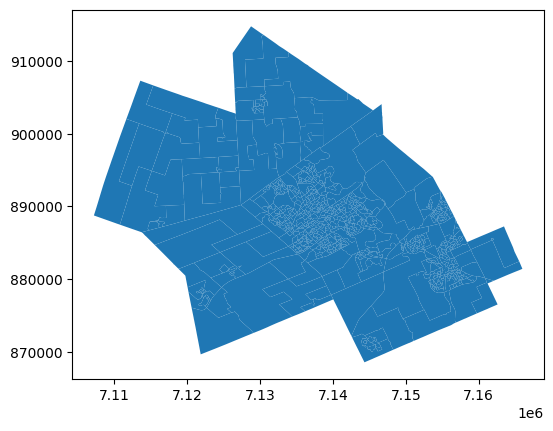

In [ ]:

Waterlooregion_shapefilename = '/content/drive/MyDrive/Group 3 Machine Learning/Project Files/Data/Inputs/waterlooregion_dissemination_areas_shapefile_data.shp'
#Waterlooregion_shapefilename = 'waterlooregion_dissemination_areas_shapefile_data.shp'

WaterlooRegion_Disseminationarea_geography =gpd.read_file(Waterlooregion_shapefilename)
shapes = WaterlooRegion_Disseminationarea_geography.geometry
dimensions = WaterlooRegion_Disseminationarea_geography.bounds

# Print information about the filtered shapefile
print(f"Number of Features: {len(WaterlooRegion_Disseminationarea_geography)}")
print(f"CRS: {WaterlooRegion_Disseminationarea_geography.crs}")
#NOTE the CRS is the projection mapping the Waterloo police data is in NAD83 UTM N17 format  will need to do a conversion on this
#print(f"Shapes: {shapes}")
#print(f"Dimensions: {dimensions}")
WaterlooRegion_Disseminationarea_geography.plot()
display(WaterlooRegion_Disseminationarea_geography)
display(WaterlooRegion_Disseminationarea_geography.dtypes)

In [ ]:
#Now we are going to add the geodata to the census so that we can map out the areas on the fly without having to constnatly reload files
#convert the Alt_Geo_Code to string so i can join it properly
regional_disseminationonly_pivot_df['ALT_GEO_CODE'] = regional_disseminationonly_pivot_df['ALT_GEO_CODE'].astype(str)
display(regional_disseminationonly_pivot_df)
#Join Census data to Geography data
Waterloo_region_dissemination_data_with_geoshapes_df = pd.merge(regional_disseminationonly_pivot_df ,WaterlooRegion_Disseminationarea_geography , left_on='ALT_GEO_CODE', right_on='DAUID', how='left')
#display(merged_df)
#NOTE : Projection for this Data file is likely different than the WAterloo egional police data set
# This is an ongoing problem that we have to bear in mind at visualization time
Waterloo_region_dissemination_data_with_geoshapes_df.to_csv("/content/drive/MyDrive/Group 3 Machine Learning/Project Files/Data/Outputs/Waterloo_region_dissemination_data_with_geoshapes.csv", index=False)

CHARACTERISTIC_NAME,ALT_GEO_CODE,Bosnian,Croatian,Dari,Iranian Persian,Odia,"Oriya, n.o.s.","Persian (Farsi), n.o.s.",Serbian,"Serbo-Croatian, n.i.e.",...,Total - Religion for the population in private households - 25% sample data,Total - Secondary (high) school diploma or equivalency certificate for the population aged 15 years and over in private households - 25% sample data,Total - Secondary (high) school diploma or equivalency certificate for the population aged 25 to 64 years in private households - 25% sample data,"Total - Tenant households in non-farm, non-reserve private dwellings - 25% sample data",Total - Time leaving for work for the employed labour force aged 15 years and over with a usual place of work or no fixed workplace address - 25% sample data,Total - Total income groups in 2020 for the population aged 15 years and over in private households - 100% data,Total - Visible minority for the population in private households - 25% sample data,Total number of census families in private households - 100% data,Total private dwellings,Unemployment rate
0,35300002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1425.0,1085.0,815.0,30.0,615.0,1080.0,1430.0,430.0,520.0,3.4
1,35300003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,380.0,355.0,170.0,135.0,145.0,350.0,380.0,105.0,221.0,12.5
2,35300004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,425.0,355.0,190.0,45.0,150.0,355.0,425.0,130.0,176.0,4.3
3,35300005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,395.0,360.0,200.0,130.0,210.0,365.0,395.0,100.0,228.0,0.0
4,35300006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,380.0,305.0,200.0,15.0,140.0,285.0,380.0,100.0,140.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,35301055,0.0,10.0,25.0,10.0,0.0,0.0,0.0,35.0,0.0,...,1365.0,1040.0,780.0,135.0,510.0,1085.0,1365.0,380.0,494.0,9.7
731,35301056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,265.0,200.0,130.0,55.0,105.0,0.0,265.0,60.0,84.0,18.8
732,35301057,0.0,35.0,65.0,40.0,0.0,0.0,10.0,105.0,0.0,...,2390.0,2060.0,1505.0,965.0,1155.0,2090.0,2390.0,555.0,1002.0,7.0
733,35301059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,19.0,0.0


In [ ]:
regional_gdf['DBUID'] = regional_gdf['DBUID'].astype('int64')

merged_proximity_withGeography_df = filtered_proximity_df.merge(regional_gdf, on='DBUID', how='inner')
merged_proximity_withGeography_df
merged_proximity_withGeography_df.to_csv('/content/drive/MyDrive/Group 3 Machine Learning/Project Files/Data/Outputs/Waterloo_region_proximity_withGeography_df.csv', index=False)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
#Forgot this on the first pass so rather than rebuilding everything I am reloading , adding x and y and then resaving
import ast

# Function to split and populate 'x_cord' and 'y_cord' columns
def split_geolocation(geolocation):
    if pd.notna(geolocation):
        try:
            x_cord, y_cord = map(float, ast.literal_eval(geolocation))
            return x_cord, y_cord
        except (ValueError, SyntaxError):
            pass
    return None, None
#Fix the missing X and Y_cord in this file
df = pd.read_csv('/content/drive/MyDrive/Group 3 Machine Learning/Project Files/Data/Outputs/WaterlooRegionIncidentDatawith_Dissemination_area_and_block.csv')
df['x_cord'], df['y_cord'] = zip(*df['GeographicLocation'].map(split_geolocation))
df.to_csv("/content/drive/MyDrive/Group 3 Machine Learning/Project Files/Data/Outputs/WaterlooRegionIncidentDatawith_Dissemination_area_and_block.csv",index=False)

<ipython-input-5-d565afcaa1ee>:14: DtypeWarning: Columns (4,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Group 3 Machine Learning/Project Files/Data/Outputs/WaterlooRegionIncidentDatawith_Dissemination_area_and_block.csv')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Group 3 Machine Learning/Project Files/Data/Outputs/WaterlooRegionIncidentDatawith_Dissemination_area_and_block.csv')
display(df.dtypes)

<ipython-input-6-af7d0c92aaf5>:1: DtypeWarning: Columns (4,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Group 3 Machine Learning/Project Files/Data/Outputs/WaterlooRegionIncidentDatawith_Dissemination_area_and_block.csv')


occurrencefileno                object
GeographicLocation              object
NearestIntersectionLocation     object
PatrolDivision                  object
PatrolZone                      object
Municipality                    object
ReportedDateandTime             object
InitialCallType                float64
InitialCallTypeDescription      object
FinalCallType                  float64
FinalCallTypeDescription_x      object
InitialPriority                float64
FinalPriority                  float64
Disposition                     object
DispatchDateandTime             object
ArrivalDateandTime              object
ClearedDateandTime              object
CallDispatchDelay              float64
CallTravelTime                 float64
CallOnSceneTime                float64
CallResponseTime               float64
CallServiceTime                float64
TotalUnitServiceTime           float64
FinalCallTypeDescription_y      object
CallGrouping                    object
Year                     